In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

In [2]:
search = pd.read_pickle("../data/search.pkl")
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Date               1726 non-null   datetime64[ns, UTC]
 1   Search Text        1630 non-null   object             
 2   Search Categories  206 non-null    object             
 3   Latitude           1726 non-null   float64            
 4   Longitude          1726 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 67.5+ KB


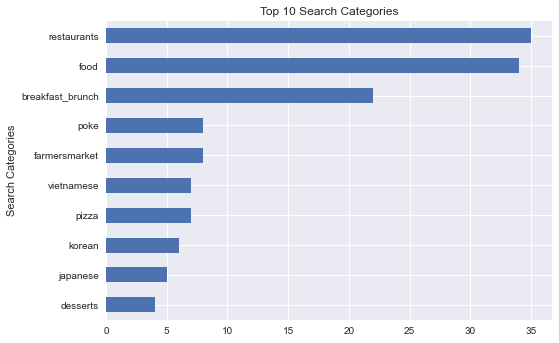

In [3]:
matplotlib.style.use('seaborn')
barplot = search.groupby("Search Categories").size().sort_values(ascending=False)[0:10][::-1].plot(kind='barh', title="Top 10 Search Categories")

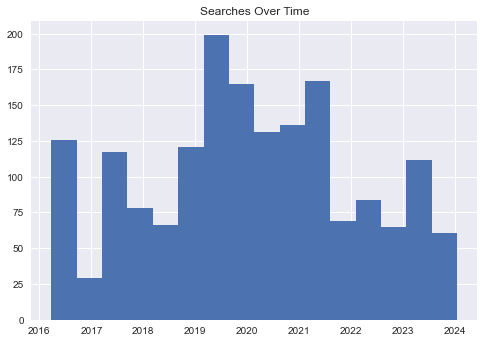

In [4]:
plt.hist(search["Date"], bins=16)
plt.title("Searches Over Time")
plt.show()

In [5]:
fig = px.scatter_mapbox(search, 
                        lat = search["Latitude"], 
                        lon = search["Longitude"], 
                        hover_name = "Search Text", 
                        hover_data = {"Search Categories":True, "Latitude":False, "Longitude":False},
                        zoom = 2, 
                        height = 600,
                        width = 800)
#fig.update_layout(mapbox_style = "open-street-map")
#fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
#fig.show()

In [6]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
stop_words = set(stopwords.words('english'))
def get_wordcloud(review):
    word_tokens = word_tokenize(review)
    filtered_sentence = [word.lower() for word in word_tokens if word not in stop_words]
    sentence = ' '.join(filtered_sentence)
    wordcloud = WordCloud(width=500, 
                          height=300, 
                          max_words=50, 
                          stopwords=stop_words, 
                          colormap='Blues').generate_from_text(sentence)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [8]:
search_list = []
for i in search["Search Text"]:
    if pd.isna(i) == False:
        search_list.append(i)
search_string = ' '.join(search_list)

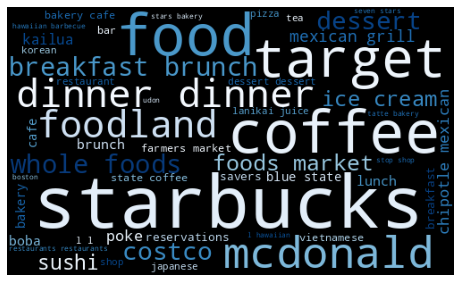

In [9]:
get_wordcloud(search_string)